# MTpy Example 08

## Geoelectric Strike

Geoelectric strike indicates the preferred direction of electrical current flow.  The strike direction becomes important when you want to figure out which modes of the impedance tensor are which, namely the TE and TM modes.  TE is parallel to geoelectric strike and TM is perpendicular.  When modeling in 1D and 2D orienting your modes properly is important. Modeling in 3D removes this dependency because all 4 components can be modeled.   

MTpy provides 3 ways to estimate strike direction, through the impedance tensor invariants [Liley, 1998](https://doi.org/10.1190/1.1444481), the phase tensor azimuth [Caldwell et al., 2004](https://doi.org/10.1111/j.1365-246X.2004.02281.x), and the induction vector real azimuth.  

The plots are rose diagrams where up is North (0 degrees strike) and East is the right (90 degrees strike).  Therefore, strike is estimated as positive clockwise.  The strike angle is relative to the coordinate system of the transfer functions, in this case geographic North.  

You can plot the strike angles as a function of period (by decade), or you can use the `working_dataframe` to organize the strike angle by geographic region.  We will show both.  

**NOTE**: the induction vector or tipper angles should be perpendicular to the strike because they point towards a good conductor.  I left it this way because how perpendicular the tippers can be a good indication of dimensionality.   

In [1]:
from pathlib import Path
from mtpy import MTCollection
#%matplotlib widget

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
%%time
with MTCollection() as mc:
    mc.open_collection(Path(r"c:\Users\jpeacock\OneDrive - DOI\SAGE\2024\EDI_Files\SAGE_tf_all.h5"))
    mt_data = mc.to_mt_data()

24:06:28T09:59:41 | INFO | line:759 |mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\SAGE\2024\EDI_Files\SAGE_tf_all.h5
CPU times: total: 14.4 s
Wall time: 14.5 s


## Plot Strike of All Stations

We have a large survey, so this may not be very useful as far as analysis, but useful to know we can do it.

### All Periods Together

Here we are plotting the strike estimation for all station and all periods into one rose diagram.  For an area this large, this plot is more or less useless.  But good to see.

24:06:28T10:00:12 | INFO | line:892 |mtpy.imaging.plot_strike | _plot_all_periods | Note: North is assumed to be 0 and the strike angle is measured clockwise positive.


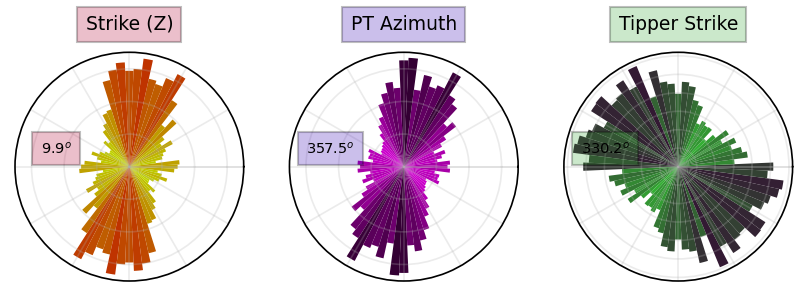

In [3]:
plot_strike_all = mt_data.plot_strike(fig_num=1)

### Plot Per Decade

A more useful way to plot the strike angle is per period.  Again this is a large survey so these don't have too much useful information.  The numbers in the boxes under the plot are the median strike values for that decade. 

24:06:28T10:01:42 | INFO | line:793 |mtpy.imaging.plot_strike | _plot_per_period | Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


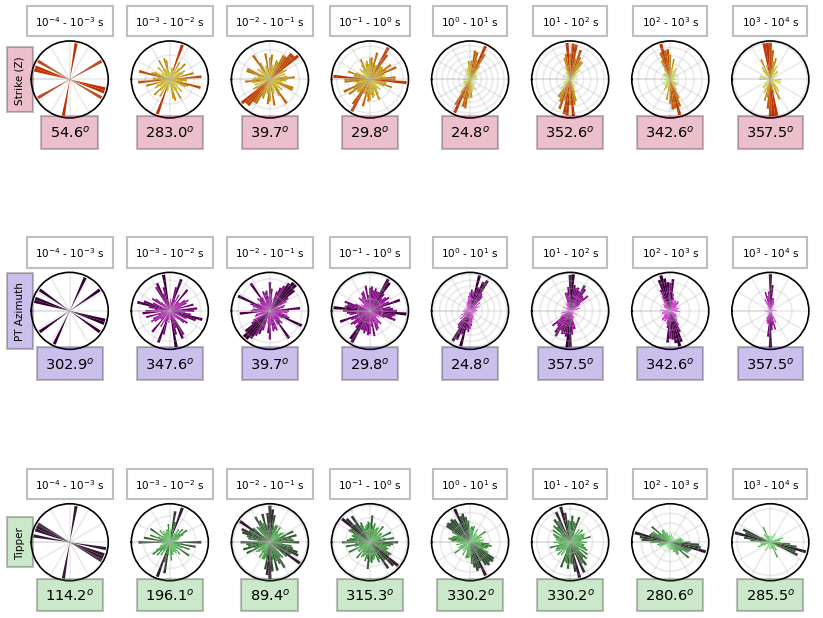

In [4]:
plot_strike_all.plot_type = 1
plot_strike_all.fig_num = 2
# to fit on a laptop screen
plot_strike_all.font_size = 3
plot_strike_all.redraw_plot()

## Plot Profile Line

Lets have a look at the change in strike across an east-west profile line. Here we will give the profile line end point and a distance from the profile line to include stations.
Again we need to set the UTM CRS.

In [5]:
mt_data.utm_crs = 28353

In [6]:
%%time
profile_mt_data = mt_data.get_profile(129, -27, 134, -27, 8000)

CPU times: user 35.6 s, sys: 803 ms, total: 36.4 s
Wall time: 36.4 s


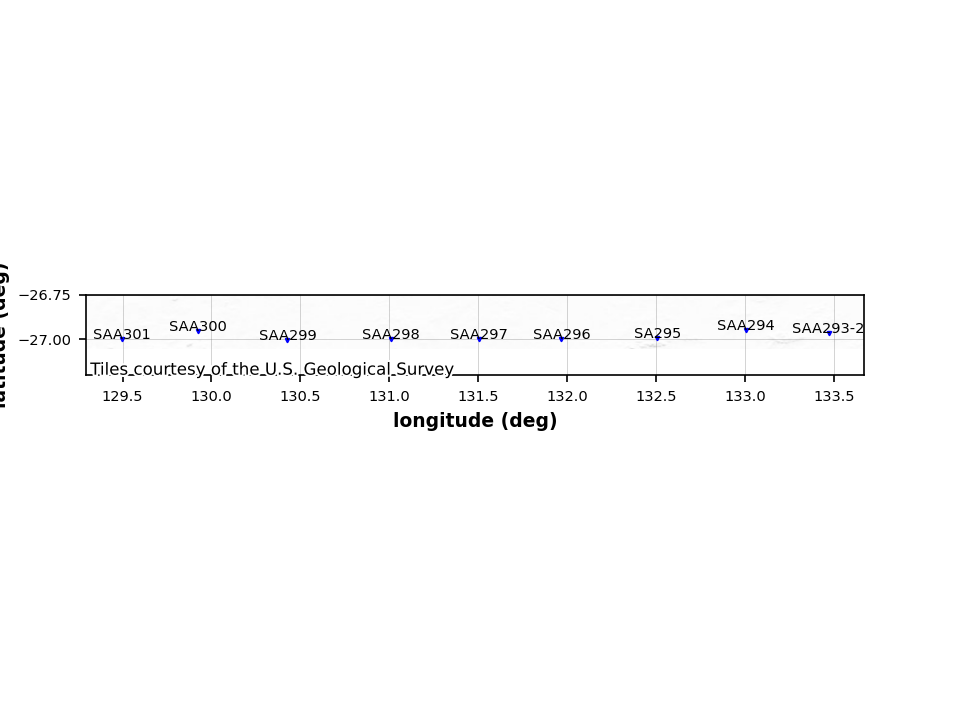

Plotting PlotStations

In [7]:
profile_mt_data.plot_stations(fig_num=10)

23:11:14T09:19:46 | INFO | line:793 |mtpy.imaging.plot_strike | _plot_per_period | Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


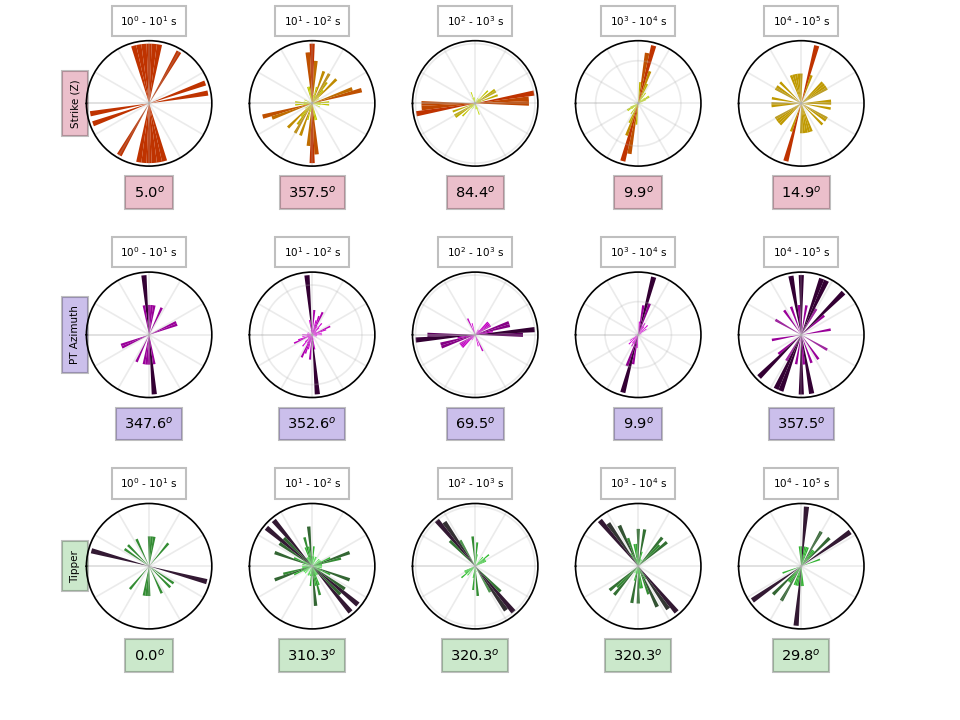

In [8]:
plot_strike_profile = profile_mt_data.plot_strike(plot_type=1, fig_num=4, font_size=3)

### Rotate to Geoelectric Strike

It can be informative to understand how homogeneous or hetergeneous the geoelectric strike angle is for each period.  If we rotate to the dominant strike direction N10E then will see how the strike angle varies with period. We will rotate by N10W so that N10E is up on the plot. The plot demonstrates that a change in geoelectric strike is observed between 100 - 1000 seconds.

23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rotated transfer function by: -10.000 degrees clockwise
23:11:14T09:19:57 | INFO | line:133 |mtpy.core.mt | rotate | Rot

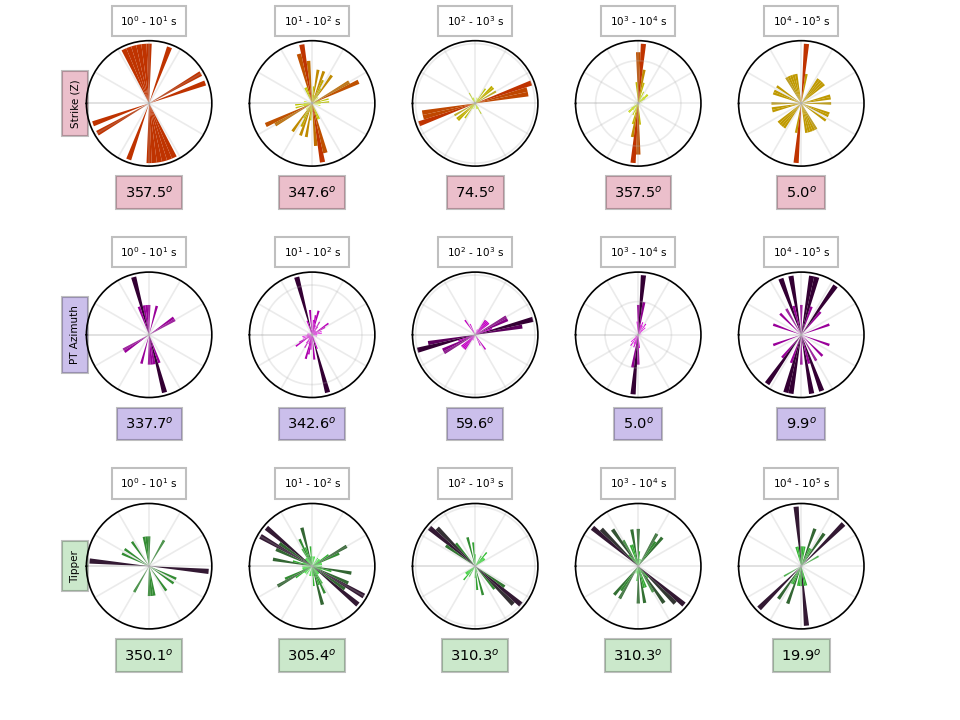

In [9]:
plot_strike_profile.rotation_angle = -10
plot_strike_profile.fig_num = 6
plot_strike_profile.redraw_plot()